In [1]:
# Initial Exploration of the rainfall data
#####################################################################
# This file explores the data from NOAA rainfall data
# to import the data we must first run the import-weater-data.py file
# this file also loads pandas
#####################################################################
import matplotlib.pyplot as plt
from datetime import date
import seaborn as sns
import numpy as np


%run -t import-weather-data.py


IPython CPU timings (estimated):
  User   :       0.61 s.
  System :       0.06 s.
Wall time:       5.58 s.


In [2]:
df_prcp.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923 entries, 0 to 3922
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     3923 non-null   datetime64[ns]
 1   avgprcp  3923 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 61.4 KB


In [3]:
df_prcp.nunique()

date       3923
avgprcp     179
dtype: int64

In [5]:
df_prcp.describe()

,avgprcp
count,3923.000000
mean,30.286770
std,79.775374
min,0.000000
25%,0.000000
50%,0.000000
75%,13.000000
max,864.000000


<AxesSubplot:xlabel='date'>

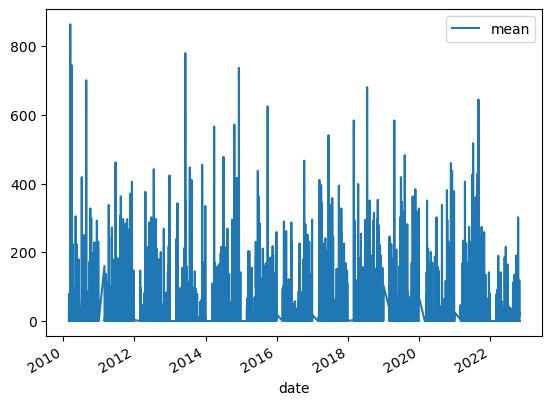

In [5]:
# get the total number of closed calls by month
total_daily_rain = df_prcp.groupby(['date']).agg({'avgprcp': ['sum']}).reset_index()

# rename the columns
total_daily_rain.columns = ['date', 'sum']

# set date as the row index
total_daily_rain = total_daily_rain.set_index("date")

# take a look
total_daily_rain.plot()

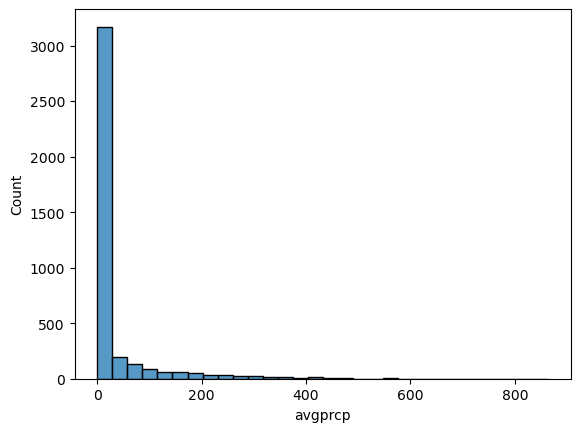

In [4]:
# we can see that most days don't have any rain
sns.histplot(df_prcp.avgprcp, bins = 30);


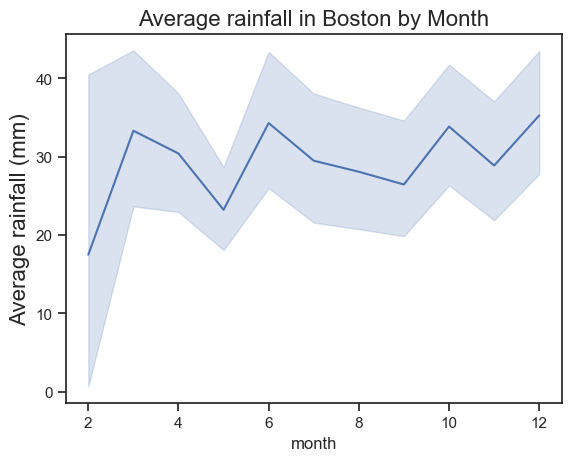

In [13]:
# let's look at rain by month
df_prcp['month'] = df_prcp['date'].dt.month

df_rain = df_prcp.groupby("month").agg({'avgprcp': ['mean']}).reset_index()  


# set a viz theme
sns.set_theme(style="ticks")

sns.lineplot(x="month"
             , y="avgprcp"
             , data=df_prcp)

plt.ylabel('Average rainfall (mm)', fontsize=16)
plt.title("Average rainfall in Boston by Month", size='16');


